# Fitbit Steps Reader:

## A program for merging your Fitbit .json files into one combined .csv file

By Kenneth Burchfiel

Relaesed under the MIT license

In [1]:
import time 
start_time = time.time() # Allows the program's runtime to be measured

import os
import pandas as pd
import time
import json
import numpy as np
import matplotlib.pyplot as plt

In order to combine all of your  Fitbit steps data into a single .csv file, you will first need to export your Fitbit account archive. To learn how to do so, go to https://help.fitbit.com/articles/en_US/Help_article/1133.htm; click the "How do I export my Fitbit account data?" text; and then navigate to the "To export a complete archive of your Fitbit account data" section of the guide.

Once this data has been downloaded, navigate to the 'Physical Activity' folder (which I found within MyFitbitData\KennethBurchfiel\\) to retrieve the individual .json steps file. Each file appears to store a 30-day-range of steps. You can either access the .json files directly within that folder, or copy and paste them into the 'original_steps_files' folder within this project.

The following cell combines the individual .json files into one combined .json file. It does so by creating a list (combined_steps_list); opening each .json file; and adding each line of each .json file to combined_steps_list.

In [2]:
folder_with_steps_data = r'C:\Users\kburc\Downloads\MyFitbitData(2)\KennethBurchfiel\Physical Activity'

for root, dirs, files in os.walk(top=folder_with_steps_data):
    file_list = [os.path.join(root,file) for file in files if 'steps' in file]

file_list

['C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-01-19.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-02-18.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-03-19.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-04-18.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-05-18.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-06-17.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-07-17.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-08-16.json',
 'C:\\Users\\kburc\\Downloads\\MyFitbitData(2)\\KennethBurchfiel\\Physical Activity\\steps-2020-09-15.json',
 'C:\\Users\\kburc\

By comparing one of the values in df_steps with the FitBit values shown on my phone, I concluded that the values shown in my FitBit app are set to UTC time. Therefore, to change these to Eastern Daylight Time (as my computer is set to Eastern Time), I subtracted 4 hours from each of these values. I wanted them in Eastern Daylight Time so that I could better compare my step totals with my WhatPulse keypress totals (which use my computer's time).
This method is not perfect, since (1) my computer used to be in Central Time before I moved to the East Coast, and (2) outside of Daylight Savings Time, the UTC offset is -5 instead of -4. However, this will still allow my

In [3]:
df_steps = pd.concat([pd.read_json(file) for file in file_list])

In [4]:
df_steps.insert(1, 'EDT_DateTime',df_steps['dateTime'] + pd.tseries.offsets.DateOffset(hours = -4))

In [5]:
df_steps

,dateTime,EDT_DateTime,value
0,2020-01-20 19:05:00,2020-01-20 15:05:00,0
1,2020-01-20 19:38:00,2020-01-20 15:38:00,0
2,2020-01-20 19:39:00,2020-01-20 15:39:00,0
3,2020-01-20 19:40:00,2020-01-20 15:40:00,0
4,2020-01-20 19:41:00,2020-01-20 15:41:00,61
...,...,...,...
25397,2022-05-05 18:48:00,2022-05-05 14:48:00,0
25398,2022-05-05 18:49:00,2022-05-05 14:49:00,0
25399,2022-05-05 18:50:00,2022-05-05 14:50:00,0
25400,2022-05-05 18:51:00,2022-05-05 14:51:00,0


In [6]:
sum(df_steps['value'])

6565077

In [7]:
df_steps.sort_values('value', ascending = False).head(20)

,dateTime,EDT_DateTime,value
22687,2022-03-04 12:28:00,2022-03-04 08:28:00,107804
16869,2022-04-26 05:23:00,2022-04-26 01:23:00,41562
18383,2022-03-30 12:12:00,2022-03-30 08:12:00,36101
24050,2022-02-04 12:09:00,2022-02-04 08:09:00,6333
25526,2022-04-07 12:13:00,2022-04-07 08:13:00,5579
3814,2021-10-14 07:06:00,2021-10-14 03:06:00,2934
5172,2022-03-14 09:32:00,2022-03-14 05:32:00,2454
12787,2021-09-23 12:09:00,2021-09-23 08:09:00,2447
20160,2021-06-05 01:53:00,2021-06-04 21:53:00,679
4529,2022-03-13 15:33:00,2022-03-13 11:33:00,580


In [8]:
df_steps.to_csv('df_steps.csv')

In [9]:
df_steps = df_steps.query("value <= 240").copy()
df_steps.rename(columns={'value':'steps'}, inplace = True)
df_steps.sort_values('dateTime', inplace = True)
df_steps.reset_index(drop=True, inplace = True)


In [10]:
sum(df_steps['steps'])

6345886

In [11]:
df_steps

,dateTime,EDT_DateTime,steps
0,2020-01-20 19:05:00,2020-01-20 15:05:00,0
1,2020-01-20 19:38:00,2020-01-20 15:38:00,0
2,2020-01-20 19:39:00,2020-01-20 15:39:00,0
3,2020-01-20 19:40:00,2020-01-20 15:40:00,0
4,2020-01-20 19:41:00,2020-01-20 15:41:00,61
...,...,...,...
738132,2022-05-05 18:48:00,2022-05-05 14:48:00,0
738133,2022-05-05 18:49:00,2022-05-05 14:49:00,0
738134,2022-05-05 18:50:00,2022-05-05 14:50:00,0
738135,2022-05-05 18:51:00,2022-05-05 14:51:00,0


In [12]:
df_steps.query("EDT_DateTime >= '2022-05-04' & EDT_DateTime < '2022-05-05'").to_csv('sample_daily_steps.csv')

Each row in the file appears to represent a single minute of steps. I don't need a minute-by-minute comparison of my steps (a daily comparison will do), so I'll use the resample() Pandas function to create a DataFrame (df_daily_steps) with one row per day.

In [13]:
df_daily_steps = df_steps.resample('D',on='EDT_DateTime').sum()
df_daily_steps.sort_index(inplace=True) # Probably not necessary
# See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
df_daily_steps

,steps
EDT_DateTime,
2020-01-20,528
2020-01-21,5477
2020-01-22,8475
2020-01-23,12982
2020-01-24,8431
...,...
2022-05-01,15240
2022-05-02,6711
2022-05-03,7737


In [14]:
df_daily_steps

,steps
EDT_DateTime,
2020-01-20,528
2020-01-21,5477
2020-01-22,8475
2020-01-23,12982
2020-01-24,8431
...,...
2022-05-01,15240
2022-05-02,6711
2022-05-03,7737


I can see the days with my highest step count as follows:

In [15]:
df_daily_steps.sort_values('steps',ascending=False)[0:10]

,steps
EDT_DateTime,
2022-03-13,25553
2022-03-14,25271
2021-04-29,24151
2021-04-10,23883
2021-05-09,23451
2021-04-30,23144
2022-03-05,22803
2022-02-11,22668
2022-03-12,22189


The following code block adds a 7-day rolling average to df_daily_steps; renames the index; and then saves the DataFrame as a .csv file.

In [16]:
df_daily_steps['7_day_avg'] = df_daily_steps['steps'].rolling(7).mean()
df_daily_steps['30_day_avg'] = df_daily_steps['steps'].rolling(30).mean()
df_daily_steps['365_day_avg'] = df_daily_steps['steps'].rolling(365).mean()
df_daily_steps.index.rename('Date',inplace=True)
df_daily_steps.to_csv('daily_steps.csv')
df_daily_steps

,steps,7_day_avg,30_day_avg,365_day_avg
Date,,,,
2020-01-20,528,NaN,NaN,NaN
2020-01-21,5477,NaN,NaN,NaN
2020-01-22,8475,NaN,NaN,NaN
2020-01-23,12982,NaN,NaN,NaN
2020-01-24,8431,NaN,NaN,NaN
...,...,...,...,...
2022-05-01,15240,10248.857143,9663.100000,9425.435616
2022-05-02,6711,10942.000000,9490.100000,9404.558904
2022-05-03,7737,11004.000000,9484.300000,9401.268493


The following code lets me see my highest 7-day step count averages.

In [17]:
df_daily_steps.sort_values('7_day_avg',ascending=False)[0:10]

,steps,7_day_avg,30_day_avg,365_day_avg
Date,,,,
2022-03-17,15504,19633.428571,12946.066667,9414.449315
2022-03-18,5748,18676.857143,12907.333333,9414.789041
2022-03-16,14828,18670.714286,12793.466667,9391.936986
2022-03-15,21645,17694.571429,12751.033333,9375.104110
2021-05-03,8938,17092.285714,10086.933333,6199.635616
2022-03-19,9129,16811.142857,12727.300000,9418.810959
2021-05-02,14331,16688.000000,9976.433333,6178.717808
2021-05-04,8945,16287.142857,10052.033333,6213.471233
2021-05-01,21698,15772.857143,9631.333333,6149.413699


I can also resample the data by week to get weekly step totals:

In [18]:
df_weekly_steps = df_steps.resample('W',on='dateTime').sum()
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample

In [19]:
df_weekly_steps

,steps
dateTime,
2020-01-26,57359
2020-02-02,77256
2020-02-09,48192
2020-02-16,34599
2020-02-23,53174
...,...
2022-04-10,68608
2022-04-17,61120
2022-04-24,68441


In [20]:
df_weekly_steps.sort_values('steps',ascending=False)[0:10]

,steps
dateTime,
2021-05-02,117991
2022-03-06,103077
2022-03-20,97749
2022-03-13,93726
2022-02-13,87776
2021-09-26,84532
2021-09-19,82407
2021-10-31,80635
2021-09-12,79036


In [21]:
len(df_weekly_steps)

120

Next, I will create graphs showing my daily and weekly step counts. I will first create a list of formatted dates for inclusion in my weekly steps chart.

In [22]:
formatted_dates = []
for i in range(len(df_weekly_steps)):
    formatted_dates.append(df_weekly_steps.index[i].strftime("%Y-%m-%d"))
    # See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# formatted_dates

Next, I'll create a weekly steps chart and save it in .png format.

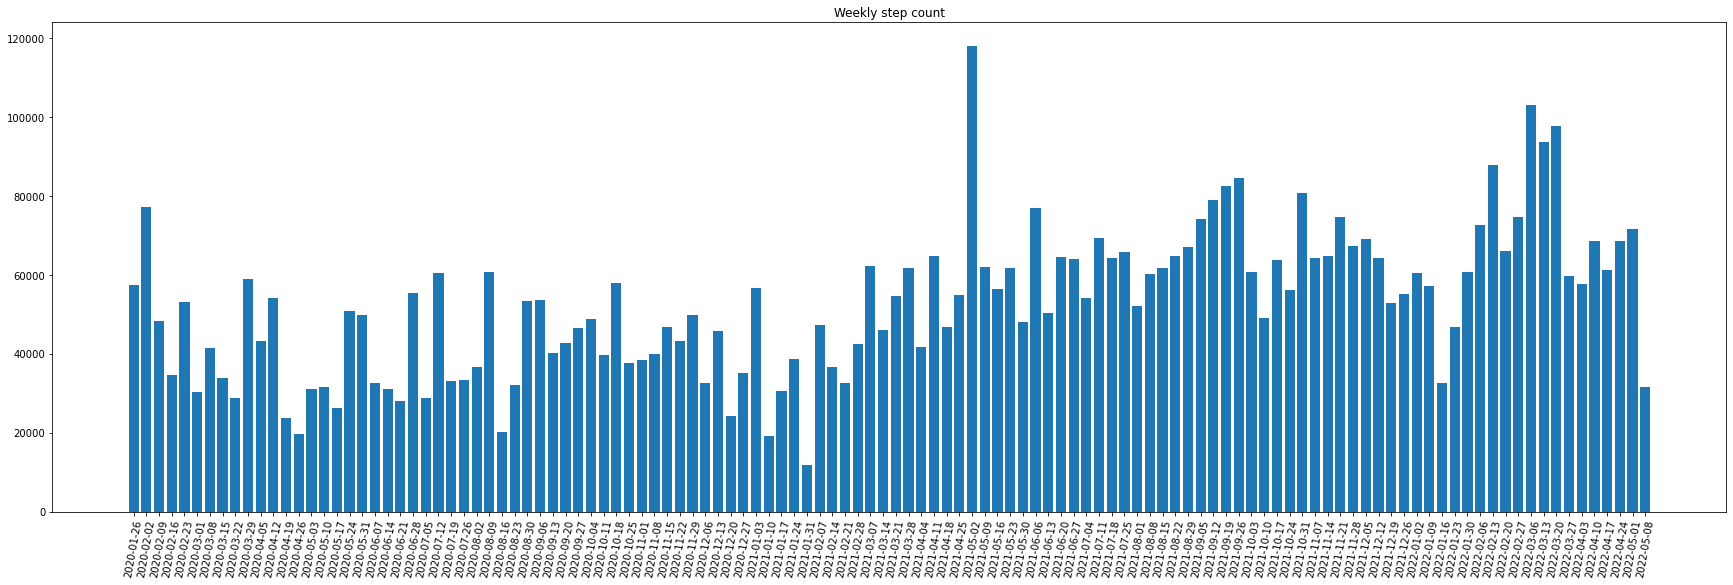

In [23]:
fig, ax = plt.subplots(figsize=[30,9]) # Making the chart wider allows all dates to appear on the graph.
fig.set_facecolor('white')
xrange = np.arange(len(df_weekly_steps))
weekly_step_graph = plt.bar(x = xrange, height=df_weekly_steps['steps']) # df_weekly_steps.index can also be used in place of x, but this messes with the chart's appearance
# See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html for 
# Matplotlib's bar chart documentation
plt.xticks(np.arange(len(df_weekly_steps)), formatted_dates, rotation=80) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.title('Weekly step count')
plt.savefig('graphs\\weekly_steps.png',dpi=400)

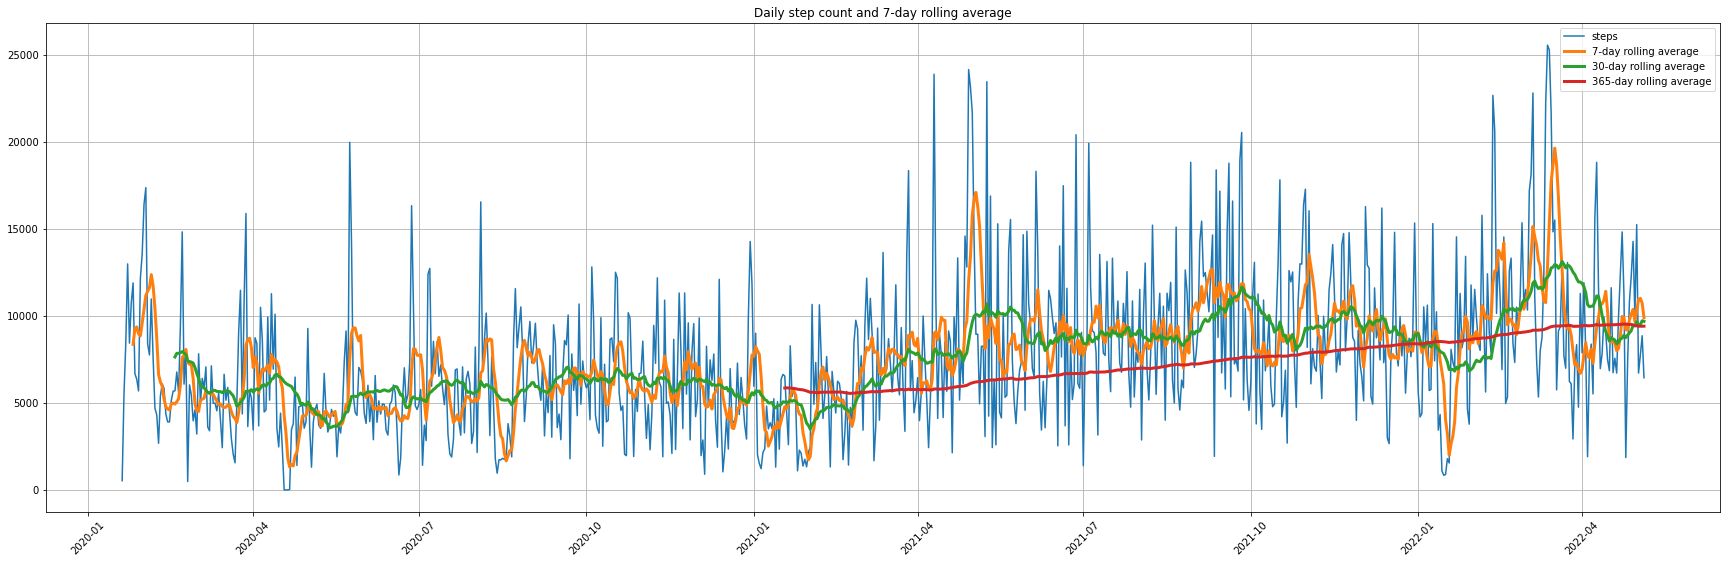

In [24]:
fig, ax = plt.subplots(figsize=[30,9])
plt.plot(df_daily_steps['steps'], label = 'steps')
plt.plot(df_daily_steps['7_day_avg'], label = '7-day rolling average', lw = 3)
plt.plot(df_daily_steps['30_day_avg'], label = '30-day rolling average', lw = 3)
plt.plot(df_daily_steps['365_day_avg'], label = '365-day rolling average', lw = 3)
fig.set_facecolor('white')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.title('Daily step count and 7-day rolling average')
plt.savefig('graphs\\daily_steps.png',dpi=400)

In [25]:
df_daily_steps

,steps,7_day_avg,30_day_avg,365_day_avg
Date,,,,
2020-01-20,528,NaN,NaN,NaN
2020-01-21,5477,NaN,NaN,NaN
2020-01-22,8475,NaN,NaN,NaN
2020-01-23,12982,NaN,NaN,NaN
2020-01-24,8431,NaN,NaN,NaN
...,...,...,...,...
2022-05-01,15240,10248.857143,9663.100000,9425.435616
2022-05-02,6711,10942.000000,9490.100000,9404.558904
2022-05-03,7737,11004.000000,9484.300000,9401.268493


In [26]:
df_daily_steps_mba = df_daily_steps.query("Date >= '2020-08-20' & Date < '2022-05-05'")
df_daily_steps_mba

,steps,7_day_avg,30_day_avg,365_day_avg
Date,,,,
2020-08-20,3069,2258.857143,5059.566667,NaN
2020-08-21,1895,2282.428571,4891.066667,NaN
2020-08-22,8632,3269.714286,5049.300000,NaN
2020-08-23,11563,4662.428571,5330.033333,NaN
2020-08-24,8167,5578.857143,5366.633333,NaN
...,...,...,...,...
2022-04-30,9957,9674.285714,9417.500000,9443.128767
2022-05-01,15240,10248.857143,9663.100000,9425.435616
2022-05-02,6711,10942.000000,9490.100000,9404.558904


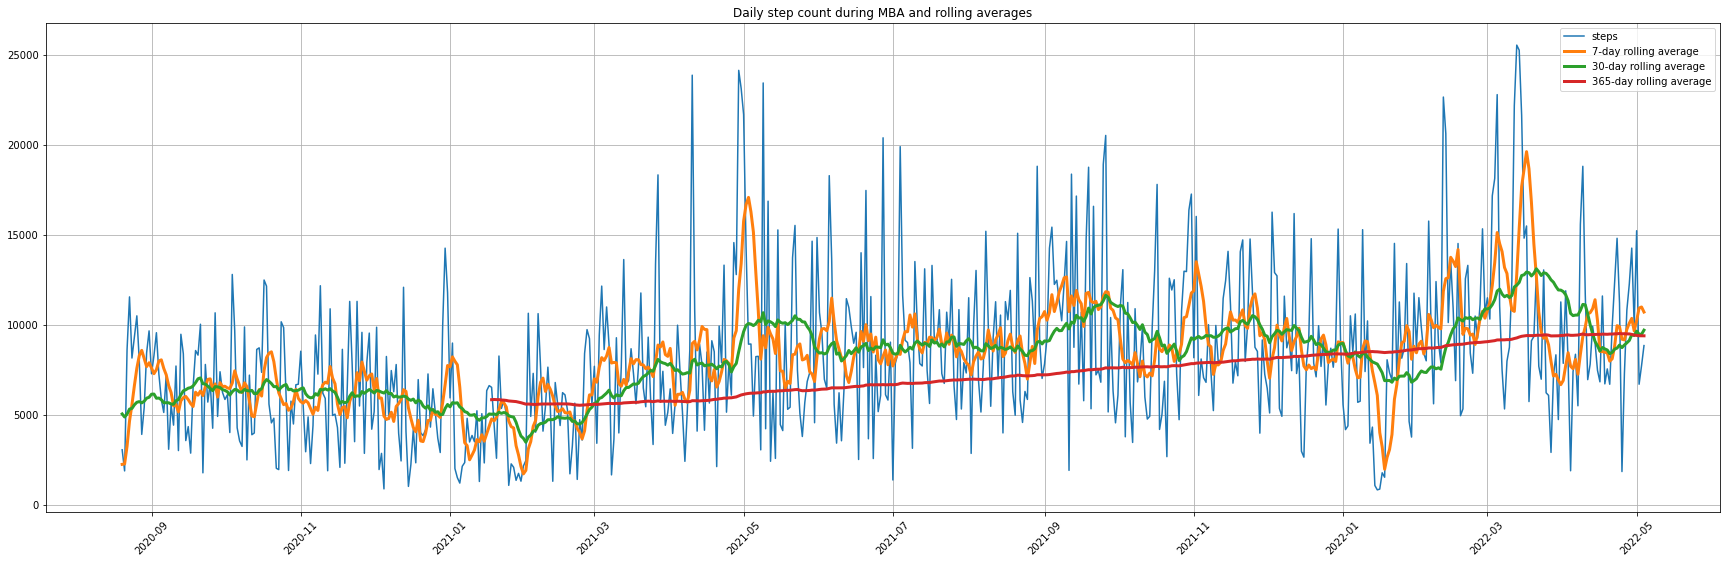

In [27]:
fig, ax = plt.subplots(figsize=[30,9])
plt.plot(df_daily_steps_mba['steps'], label = 'steps')
plt.plot(df_daily_steps_mba['7_day_avg'], label = '7-day rolling average', lw = 3)
plt.plot(df_daily_steps_mba['30_day_avg'], label = '30-day rolling average', lw = 3)
plt.plot(df_daily_steps_mba['365_day_avg'], label = '365-day rolling average', lw = 3)
fig.set_facecolor('white')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.title('Daily step count during MBA and rolling averages')
plt.savefig('graphs\\daily_steps_during_MBA.png',dpi=400)

In total, my FitBit has logged the following number of steps:

In [28]:
print(sum(df_steps['steps']))

6345886


That's it for this program. I hope you will find this code useful in analyzing your own Fitbit steps data.

In [29]:
end_time = time.time()
run_time = end_time - start_time
run_minutes = run_time // 60
run_seconds = run_time % 60
print("Completed run at",time.ctime(end_time),"(local time)")
print("Total run time:",'{:.2f}'.format(run_time),"second(s) ("+str(run_minutes),"minute(s) and",'{:.2f}'.format(run_seconds),"second(s))") # Only meaningful when the program is run nonstop from start to finish

Completed run at Sun May 15 23:32:40 2022 (local time)
Total run time: 64.07 second(s) (1.0 minute(s) and 4.07 second(s))
